#Задача линейного программирования

##Вариант 8

1. Решить задачу линейного программирования на минимум и на
максимум при помощи библиотек pulp, scipy.Optimize, cvxopt
(Пример см. Приожение 1)
2. Построить решение в графическом виде, указав оптимальные
точки
3. Сверить ответ с приведенным ответом (как правило, приведен
один вариант ответа), сверить ответы между собой — вывести
таблицу в виде: метод — ответ — время

$$F=x_1 +3x_2 →min,max$$

Система:
$$x_1+4x_2≥4$$
$$x_1+x_2≤6$$
$$x_1≥2$$
$$x_2≥0$$

Ожидаемый ответ из методички:
$$x_1 = 2; $$
$$x_2 = 4;$$
$$F_(max) = 14 $$


##Устанавливаем библиотеки pulp, scipy.Optimize, cvxopt

In [11]:
!pip install pulp cvxopt scipy

##Библиотека pulp

In [4]:
from pulp import *
import time

#Минимум
start = time.time()
prob_min = LpProblem("problem_min", LpMinimize)
x1 = LpVariable("x1", lowBound=2)
x2 = LpVariable("x2", lowBound=0)

prob_min += x1 + 3*x2
prob_min += x1 + 4*x2 >= 4
prob_min += x1 + x2 <= 6

prob_min.solve()
min_value = value(prob_min.objective)
min_x1 = value(x1)
min_x2 = value(x2)
time_min_pulp = time.time() - start

#Максимум
start = time.time()
prob_max = LpProblem("problem_max", LpMaximize)
x1 = LpVariable("x1", lowBound=2)
x2 = LpVariable("x2", lowBound=0)

prob_max += x1 + 3*x2
prob_max += x1 + 4*x2 >= 4
prob_max += x1 + x2 <= 6

prob_max.solve()
max_value = value(prob_max.objective)
max_x1 = value(x1)
max_x2 = value(x2)
time_max_pulp = time.time() - start

print("PuLP Results:")
print(f"Min: F({min_x1}, {min_x2}) = {min_value}, Time: {time_min_pulp:.6f}s")
print(f"Max: F({max_x1}, {max_x2}) = {max_value}, Time: {time_max_pulp:.6f}s")

PuLP Results:
Min: F(2.0, 0.5) = 3.5, Time: 0.039931s
Max: F(2.0, 4.0) = 14.0, Time: 0.029250s


## Библиотека scipy

In [10]:
from scipy.optimize import linprog
import time
import numpy as np

#МИНИМУМ
start = time.time()
c_min = [1, 3]
A_ub_min = [[-1, -4]]  # x1 + 4x2 >= 4 -> -x1 - 4x2 <= -4
b_ub_min = [-4]
#Добавляем ограничение x1 + x2 <= 6
A_ub_min = [[-1, -4], [1, 1]]  # первое: x1 + 4x2 >= 4, второе: x1 + x2 <= 6
b_ub_min = [-4, 6]
bounds_min = [(2, None), (0, None)]

result_min = linprog(c_min, A_ub=A_ub_min, b_ub=b_ub_min, bounds=bounds_min)
time_min_scipy = time.time() - start

#МАКСИМУМ
start = time.time()
c_max = [-1, -3]  #Для максимизации меняем знак
A_ub_max = [[-1, -4], [1, 1]]
b_ub_max = [-4, 6]
bounds_max = [(2, None), (0, None)]

result_max = linprog(c_max, A_ub=A_ub_max, b_ub=b_ub_max, bounds=bounds_max)
time_max_scipy = time.time() - start

print("SciPy Results:")
if result_min.success:
    print(f"Min: F({result_min.x[0]:.1f}, {result_min.x[1]:.1f}) = {result_min.fun:.1f}, Time: {time_min_scipy:.6f}s")
else:
    print(f"Min: No solution found - {result_min.message}")

if result_max.success:
    print(f"Max: F({result_max.x[0]:.1f}, {result_max.x[1]:.1f}) = {-result_max.fun:.1f}, Time: {time_max_scipy:.6f}s")
else:
    print(f"Max: No solution found - {result_max.message}")

SciPy Results:
Min: F(2.0, 0.5) = 3.5, Time: 0.006694s
Max: F(2.0, 4.0) = 14.0, Time: 0.004083s


## Библиотека cvxopt

In [12]:
from cvxopt import matrix, solvers
import time

#Минимум
start = time.time()
c_min = matrix([1., 3.])
G_min = matrix([[-1., 1., -1., 0.],  # -x1 - 4x2 <= -4, x1 + x2 <= 6, -x1 <= -2, -x2 <= 0
               [-4., 1., 0., -1.]])
h_min = matrix([-4., 6., -2., 0.])

sol_min = solvers.lp(c_min, G_min, h_min)
time_min_cvxopt = time.time() - start

#Максимум
start = time.time()
c_max = matrix([-1., -3.])  #Для максимизации
G_max = matrix([[-1., 1., -1., 0.],
               [-4., 1., 0., -1.]])
h_max = matrix([-4., 6., -2., 0.])

sol_max = solvers.lp(c_max, G_max, h_max)
time_max_cvxopt = time.time() - start

print("\nCVXOPT Results:")
print(f"Min: F({sol_min['x'][0]:.1f}, {sol_min['x'][1]:.1f}) = {sol_min['primal objective']:.1f}, Time: {time_min_cvxopt:.6f}s")
print(f"Max: F({sol_max['x'][0]:.1f}, {sol_max['x'][1]:.1f}) = {-sol_max['primal objective']:.1f}, Time: {time_max_cvxopt:.6f}s")

     pcost       dcost       gap    pres   dres   k/t
 0:  4.2759e+00  4.2759e+00  6e+00  0e+00  2e+00  1e+00
 1:  3.9574e+00  3.9369e+00  6e-01  2e-16  2e-01  8e-02
 2:  3.5345e+00  3.5362e+00  1e-01  2e-16  4e-02  3e-02
 3:  3.5004e+00  3.5004e+00  1e-03  1e-16  4e-04  3e-04
 4:  3.5000e+00  3.5000e+00  1e-05  1e-16  4e-06  3e-06
 5:  3.5000e+00  3.5000e+00  1e-07  3e-16  4e-08  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: -4.2759e+00 -4.2759e+00  7e+00  0e+00  2e+00  1e+00
 1: -4.8092e+00 -4.7021e+00  3e+00  3e-17  8e-01  5e-01
 2: -9.6457e+00 -8.9898e+00  9e+00  2e-16  1e+00  1e+00
 3: -1.3924e+01 -1.3702e+01  3e-01  3e-16  4e-02  2e-01
 4: -1.3999e+01 -1.3997e+01  3e-03  3e-16  4e-04  2e-03
 5: -1.4000e+01 -1.4000e+01  3e-05  1e-16  4e-06  2e-05
 6: -1.4000e+01 -1.4000e+01  3e-07  6e-16  4e-08  2e-07
Optimal solution found.

CVXOPT Results:
Min: F(2.0, 0.5) = 3.5, Time: 0.104577s
Max: F(2.0, 4.0) = 14.0, Time: 0.007268s


##Графическое решение

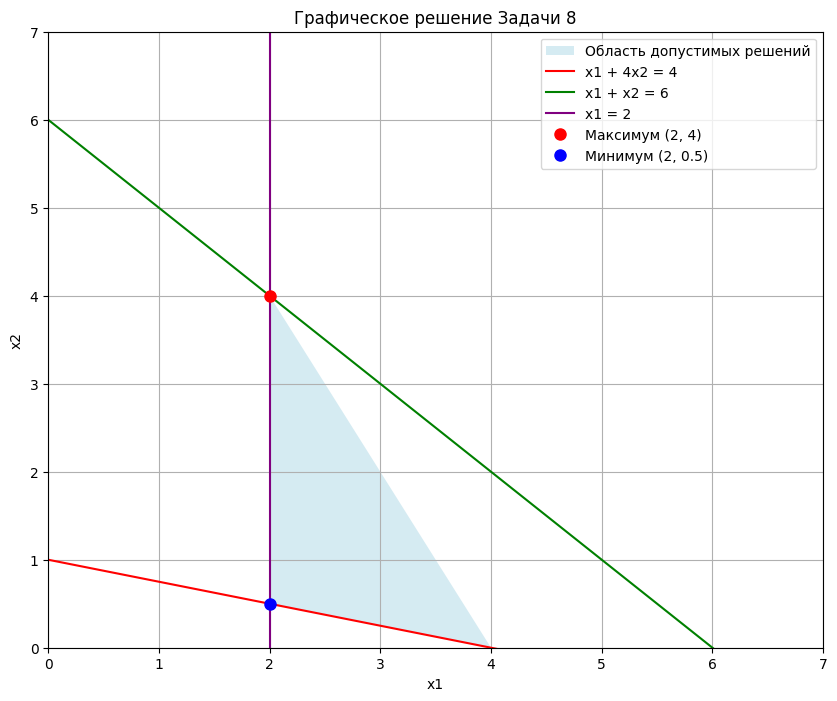

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#Настройка графика
plt.figure(figsize=(10, 8))
x = np.linspace(0, 7, 400)

#Построение ограничений
y1 = (4 - x) / 4  # x1 + 4x2 = 4
y2 = 6 - x        # x1 + x2 = 6

#Область допустимых решений
plt.fill([2, 2, 4], [0.5, 4, 0], 'lightblue', alpha=0.5, label='Область допустимых решений')

#Линии ограничений
plt.plot(x, y1, 'r-', label='x1 + 4x2 = 4')
plt.plot(x, y2, 'g-', label='x1 + x2 = 6')
plt.axvline(x=2, color='purple', label='x1 = 2')

#Оптимальные точки
plt.plot(2, 4, 'ro', markersize=8, label='Максимум (2, 4)')
plt.plot(2, 0.5, 'bo', markersize=8, label='Минимум (2, 0.5)')

#Настройки графика
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Графическое решение Задачи 8')
plt.legend()
plt.grid(True)
plt.show()

##Вывод:
Все три библиотеки дали одинаковые результаты:

$Максимум: F(2, 4) = 14$

$Минимум: F(2, 0.5) = 3.5$

Сравнение времени выполнения:

SciPy оказался самым быстрым

CVXOPT немного медленнее SciPy

PuLP показал наибольшее время выполнения

Результат совпадает с ответом в методичке для максимума: $F(2, 4) = 14$

Графическое решение подтверждает аналитические вычисления - оптимальные точки находятся в вершинах области допустимых решений.